In [1]:
#!pip install -r requirements.txt

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from IPython.display import display, Markdown

In [3]:
wine_quality = fetch_ucirepo(id=186)

In [4]:
X = wine_quality.data.features
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [5]:
Y = wine_quality.data.targets
Y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
6492,6
6493,5
6494,6
6495,7


In [6]:
df = pd.concat([X, Y], axis=1)
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [7]:
N = len(df)
D = len(X.columns)
L = df['quality'].nunique()

In [8]:
Markdown(f"#### No dataset existem {N} observações, {D} variáveis preditivas e {L} classes.")

#### No dataset existem 6497 observações, 11 variáveis preditivas e 7 classes.

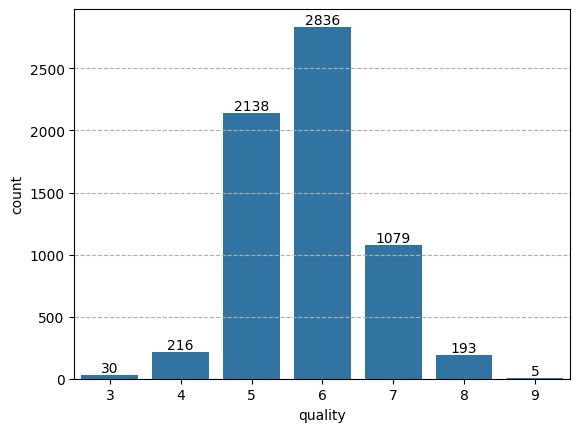

In [9]:
ax = sns.countplot(
    data=df,
    x = 'quality'
)
ax.bar_label(
    ax.containers[0]
)
ax.grid(axis='y', linestyle='--')
plt.show()

## Mono-variate analysis of each Predictor

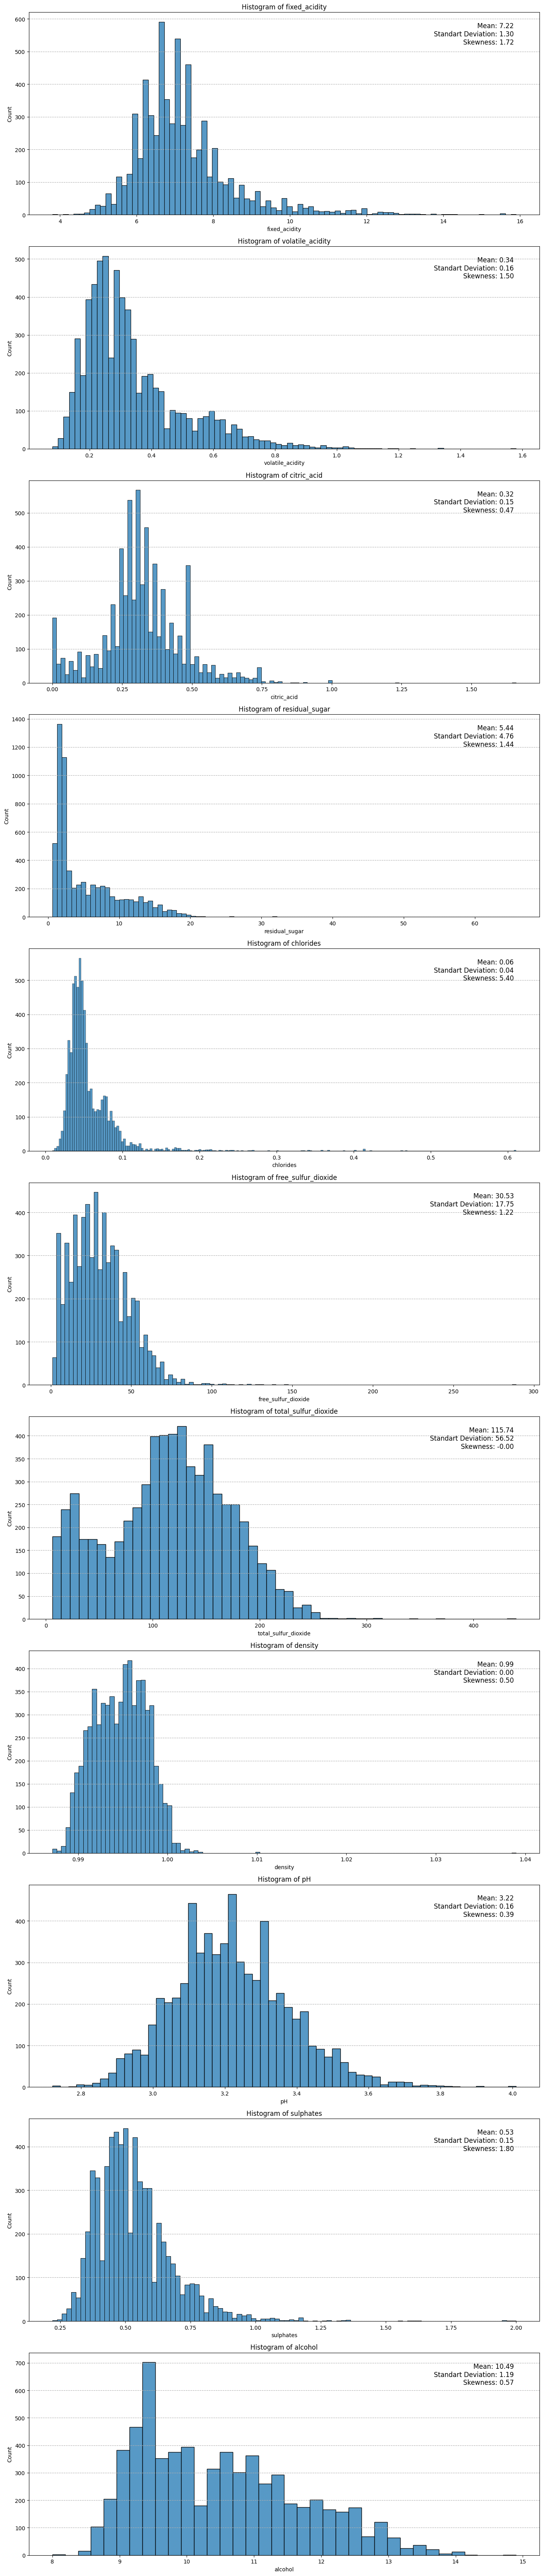

In [10]:
fig, axes = plt.subplots(11, 1, figsize=(14, 66))
for i, feature in enumerate(X):
    ax = sns.histplot(
        data=X,
        x = feature,
        ax = axes.flatten()[i]
    )
    ax.grid(axis='y', linestyle='--')
    ax.set_title(f"Histogram of {feature}")

    mean = X[feature].mean()
    std = X[feature].std()
    skewness = X[feature].skew()
    ax.text(0.95, 0.95, 
            f'Mean: {mean:.2f}\nStandart Deviation: {std:.2f}\nSkewness: {skewness:.2f}',
            transform=ax.transAxes,
            fontsize=12,
            ha='right', 
            va='top'
            )

plt.tight_layout()
plt.show()
    

In [11]:
df_table = pd.DataFrame(columns=['Predictor', 'Mean', 'Standart Deviation', 'Skewness'])
for i, feature in enumerate(X):
    df_table.loc[i] = [feature, f'{X[feature].mean():.2f}', f'{X[feature].std():.2f}', f'{X[feature].skew():.2f}']

display(
        df_table
        .style
        .set_table_styles([{'selector': 'td', 'props': 'text-align: center;'}])
        )


,Predictor,Mean,Standart Deviation,Skewness
0,fixed_acidity,7.22,1.30,1.72
1,volatile_acidity,0.34,0.16,1.50
2,citric_acid,0.32,0.15,0.47
3,residual_sugar,5.44,4.76,1.44
4,chlorides,0.06,0.04,5.40
5,free_sulfur_dioxide,30.53,17.75,1.22
6,total_sulfur_dioxide,115.74,56.52,-0.00
7,density,0.99,0.00,0.50
8,pH,3.22,0.16,0.39
9,sulphates,0.53,0.15,1.80
